In [1]:
import os
import path
import struct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Source for reading the idx files as numpy arrays: https://gist.github.com/tylerneylon
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
def step_fn(x):
    i = 0
    y = np.empty([10,1])
    for each in x:
        if each >= 0:
            y[i] = 1.0
        else:
            y[i] = 0.0
        i += 1
    return y

In [4]:
def training_errors(epoch, errors):
    for i in range(n):
        xi = train_data[i]
        xi.resize(784, 1)
        v = np.matmul(w,xi)
        prediction = v.argmax(axis=0)
        actual = train_labels[i]
        if prediction != actual:
            errors[epoch] += 1
    return errors[epoch]

In [5]:
def update_weight(w):
    for i in range(n):
        xi = train_data[i]
        xi.resize(784, 1)
        y = np.array(step_fn(np.matmul(w,xi)))
        label = np.zeros((1,10)).T
        label[train_labels[i]] = 1
        difference = label - y
        xit = np.transpose(xi)
        update = learning_rate * np.matmul(difference, xit)
        w += update

In [6]:
def learning_weights(w, epoch, threshold, learning_rate):
    while epoch<100:
        errors.append(0)
        errors[epoch] = training_errors(epoch, errors)
        update_weight(w)
        epoch += 1
        if errors[epoch-1]/n <= threshold:
            break

In [7]:
def plot_graph(errors):
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(range(len(errors)), errors, c = 'green')
    plt.ylabel('Number of Misclassifications')
    plt.xlabel('Number of Epochs')
    plt.title('Errors vs Epochs')
    plt.show()

In [8]:
def find_errors():
    test_errors = 0
    for i in range(len(test_data)):
        xi = test_data[i]
        xi.resize(784, 1)
        v = np.matmul(w ,xi)
        prediction = v.argmax(axis=0)
        actual = test_labels[i]
        if prediction != actual:
            test_errors += 1
    print ("Number of errors in test data: ", test_errors)
    print ("Percentage of test errors: ", test_errors*100/len(test_data))

In [9]:
# Data Source: http://yann.lecun.com/exdb/mnist/
train_data = read_idx('train-images.idx3-ubyte')
train_labels = read_idx('train-labels.idx1-ubyte')
test_data = read_idx('t10k-images.idx3-ubyte')
test_labels = read_idx('t10k-labels.idx1-ubyte')

In [10]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 50
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

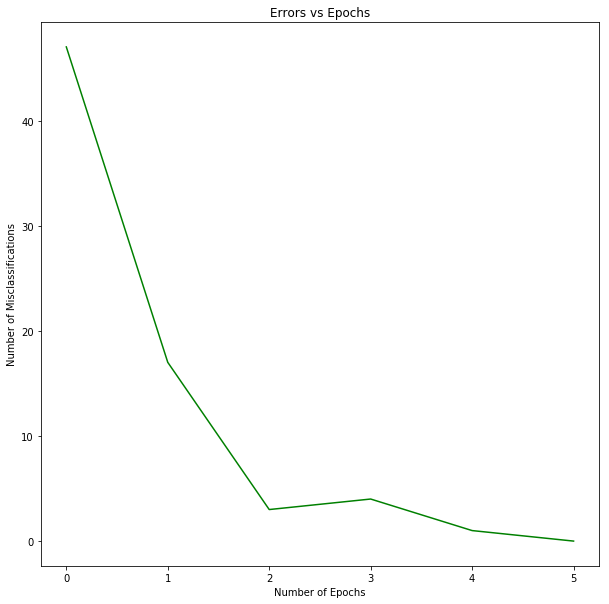

Number of errors in test data:  4243
Percentage of test errors:  42.43


In [11]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

### 2 (f)
#### The percentage of errors obtained in test data is 42.43% and far lower than the initial error obtained in the training data because we have updated the weights accordingly and the network better understands how to process the inputs after being trained for 5 epochs.
#### Eventually, the number of errors for the training set goes to 0 but since n=50 is a small value the test error rate is high

In [12]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 1000
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

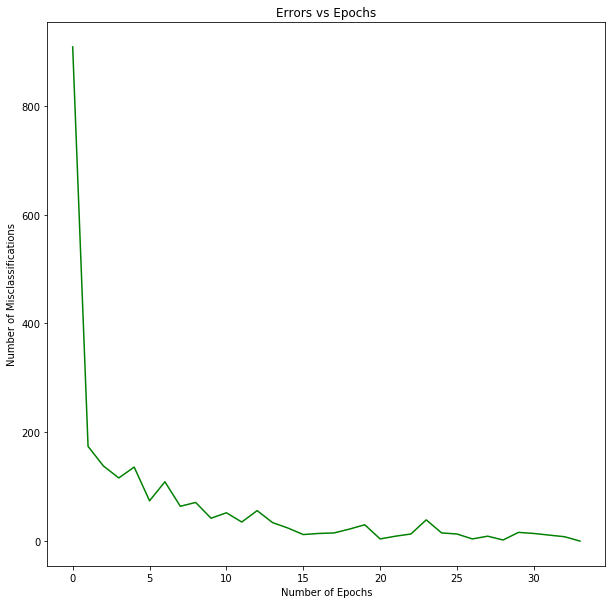

Number of errors in test data:  1686
Percentage of test errors:  16.86


In [13]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

### 2 (g)
#### The percentage of errors obtained in test data is 16.86% and far lower than the initial error obtained initiallly in the training data because we have updated the weights accordingly and the network better understands how to process the inputs after being trained for 33 epochs.
#### Eventually, the number of errors for the training set goes to 0 but n=1000 is still not enough for the error rate to be 0 as well.
#### Compared to (e), we have trained the network on a lot more data and for many more epochs and we have a better updated weight and hence the lower error rate on test data.

In [14]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.0
learning_rate = 1.0
errors = []

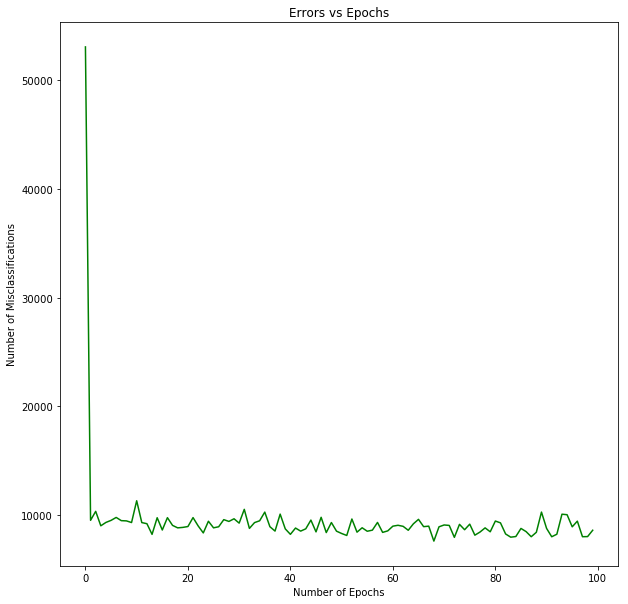

Number of errors in test data:  1499
Percentage of test errors:  14.99


In [15]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

### 2 (h)
#### Here I have limited the number of epochs to 100. After the first epoch we can see that the error rate does not fall anymore and we just keeps oscillating between 7,000 and 12,000 for the training data. 
#### For the testing data, the percentage of misclassified data is 15% which is more or less similar to n = 1000

### 2 (i)

#### Based on the above results the threshold value I have chosen is 0.15 because it converges quickly and the results are still comparable to a lower threshold value

In [16]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

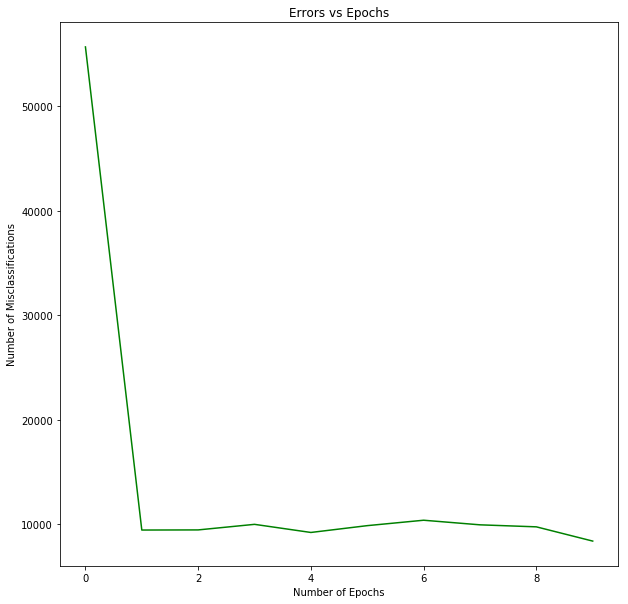

Number of errors in test data:  1611
Percentage of test errors:  16.11


In [17]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

#### First time

In [18]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

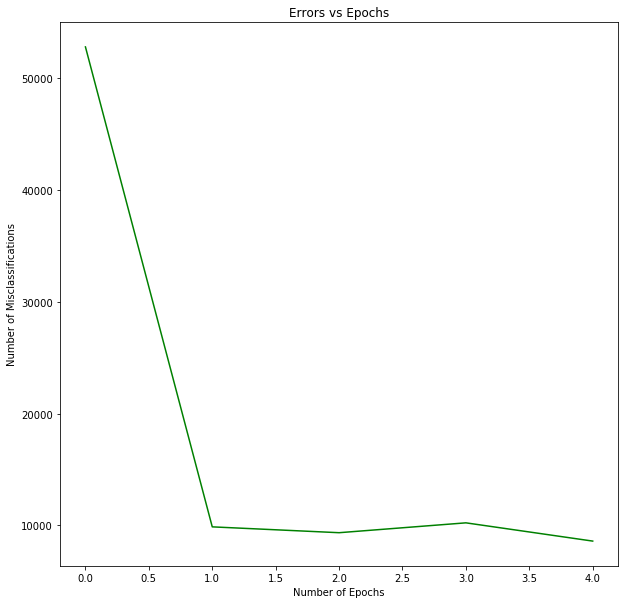

Number of errors in test data:  1587
Percentage of test errors:  15.87


In [19]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

#### Second time

In [20]:
w = np.random.uniform(-1, 1, size=(10,784))
n = 60000
epoch = 0
threshold = 0.15
learning_rate = 1.0
errors = []

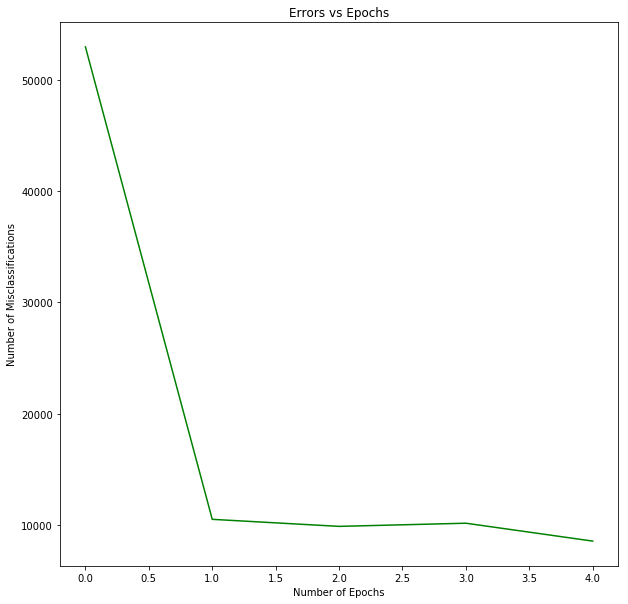

Number of errors in test data:  1688
Percentage of test errors:  16.88


In [21]:
learning_weights(w, epoch, threshold, learning_rate)
plot_graph(errors)
find_errors()

#### Third time

#### As we can see the graph looks the same for all three attempts. The percentage of errors varies from 15-16% which is still comparable to the results where n = 1000.